# Problem Statement

Let’s go through the problem statement once as it is very crucial to understand the objective
before working on the dataset. The problem statement is as follows:

***The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a
tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is
to classify racist or sexist tweets from other tweets.***

**Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is
racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the
labels on the given test dataset.**

## Loading Libraries and Data

In [2]:
import re # for regular expression
import nltk # for text manipulation
import numpy as np # for mathematical calculation
import pandas as pd # for data exploration
import seaborn as sns # for data visulaization
import matplotlib.pyplot as plt # for plotting
import string
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) # for ignore warnings
%matplotlib inline

In [3]:
# let's read train  and test data
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [4]:
train.shape, test.shape

((31962, 3), (17197, 2))

Text is a highly unstructured form of data, various types of noise are present in it and the data is
not readily analyzable without any pre-processing. The entire process of cleaning and
standardization of text, making it noise-free and ready for analysis is known as text
preprocessing. We will divide it into 2 parts:
- Data Inspection
- Data Cleaning

## Data Inspection
**Let’s check out a few non racist/sexist tweets.**

In [5]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


**Now let's check out some racist/sexist tweets**

In [6]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


**There are quite a many words and characters which are not really required. So, we will try to
keep only those words which are important and add value.**

In [7]:
## Let’s check dimensions of the train and test dataset.
train.shape, test.shape

((31962, 3), (17197, 2))

**Train set has 31,962 tweets and test set has 17,197 tweets.**

In [8]:
# Let’s have a lool at label-distribution in the train dataset.
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [9]:
train['label'].value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

**In the train dataset, we have 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%)
tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.**

Now we will check the distribution of length of the tweets, in terms of words, in both train and
test data.

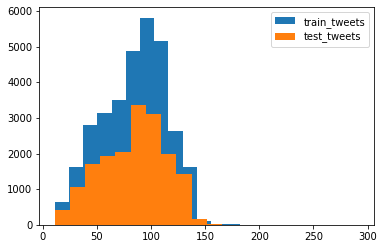

In [10]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

## Data Cleaning

**In any natural language processing task, cleaning raw text data is an important step. It helps in
getting rid of the unwanted words and characters which helps in obtaining better features. If we
skip this step then there is a higher chance that you are working with noisy and inconsistent
data. The objective of this step is to clean noise those are less relevant to find the sentiment of
tweets such as punctuation, special characters, numbers, and terms which don’t carry much
weightage in context to the text.**

**Before we begin cleaning, let’s first combine train and test datasets. Combining the datasets will
make it convenient for us to preprocess the data. Later we will split it back into train and test
data.**

In [11]:
combi = train.append(test, ignore_index=True)
combi.shape

(49159, 3)

In [12]:
#Given below is a user-defined function to remove unwanted text patterns from the tweets.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

**We will be following the steps below to clean the raw tweets in out data.**
1. We will remove the twitter handles as they are already masked as @user due to privacy
concerns. These twitter handles hardly give any information about the nature of the tweet.
2. We will also get rid of the punctuations, numbers and even special characters since they
wouldn’t help in differentiating different types of tweets.
3. Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will
try to remove them as well from our data.
4. Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and
lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce
them to their root word, which is ‘love’. It will help in reducing the total number of unique
words in our data without losing a significant amount of information

### 1. Removing Twitter Handles (@user)

Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that
we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular
expression which will pick any word starting with ‘@’.

In [13]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### 2. Removing Punctuations, Numbers, and Special Characters
Here we will replace everything except characters and hashtags with spaces. The regular
expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [14]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ",regex=True)
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


### 3. Removing Short Words

We have to be a little careful here in selecting the length of the words which we want to remove.
So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”,
“oh” are of very little use. It is better to get rid of them.

In [15]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# Let’s take another look at the first few rows of the combined dataframe.
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


You can see the difference between the raw tweets and the cleaned tweets (tidy_tweet) quite
clearly. Only the important words in the tweets have been retained and the noise (numbers,
punctuations, and special characters) has been removed.

### 4. Text Normalization
Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we
will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the
process of splitting a string of text into tokens.

In [16]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: tidy_tweet, dtype: object

In [17]:
# Now we can normalize the tokenized tweets.
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer
function.

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


## Story Generation and Data Visualization from Tweets

**In this section, we will explore the cleaned tweets. Exploring and visualizing data, no matter
whether its text or any other data, is an essential step in gaining insights. Do not limit yourself to
only these methods told in this course, feel free to explore the data as much as possible.
Before we begin exploration, we must think and ask questions related to the data in hand. A few
probable questions are as follows:**
 1. What are the most common words in the entire dataset?
 2. What are the most common words in the dataset for negative and positive tweets,
respectively?
 3. How many hashtags are there in a tweet?
 4. Which trends are associated with my dataset?
 5. Which trends are associated with either of the sentiments? Are they compatible with the
sentiments?

### A) Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One
way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less
frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

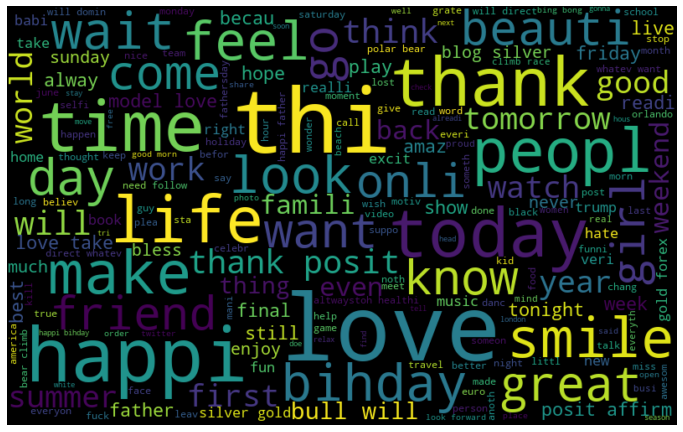

In [19]:
from wordcloud import WordCloud 

all_words = ' '.join([text for text in combi['tidy_tweet']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(12, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**We can see most of the words are positive or neutral. Words like love, great, friend, life are the
most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist
tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our
train data.**

### B) Words in non racist/sexisttweets

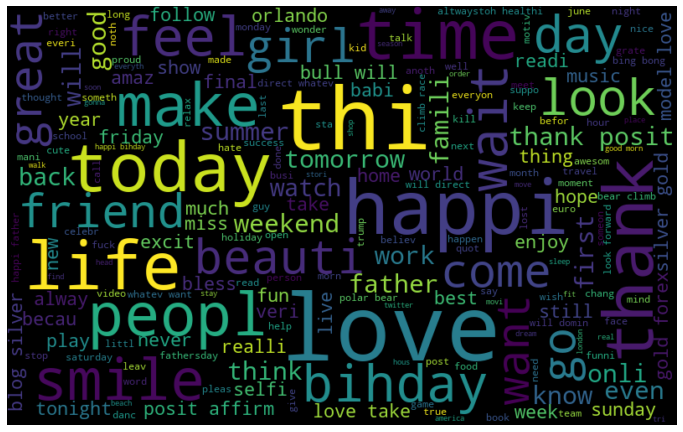

In [20]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

**Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets.
Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and
sexist terms.**

### C) Racist/Sexist Tweets

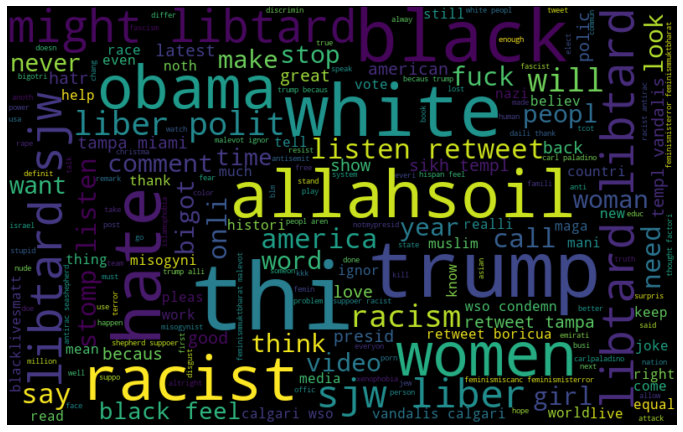

In [21]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(12, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**As we can clearly see, most of the words have negative connotations. So, it seems we have a
pretty good text data to work on. Next we will the hashtags/trends in our twitter data.**

### D) Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in
time. We should try to check whether these hashtags add any value to our sentiment analysis
task, i.e., they help in distinguishing tweets into the different sentiments.

For instance, given below is a tweet from our dataset:

**"What has today's attitude to women to got in common with that of norm bates?. #psycho #feminism #hollaback"**

The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.
We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the
other for racist/sexist tweets.

In [22]:
# function to collect hashtags 
def hashtag_extract(x): 
    hashtags = [] 
    # Loop over the words in the tweet 
    for i in x:
        ht = re.findall(r"#(\w+)", i) 
        hashtags.append(ht) 
    return hashtags

# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’
hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

### Non-Racist/Sexist Tweets

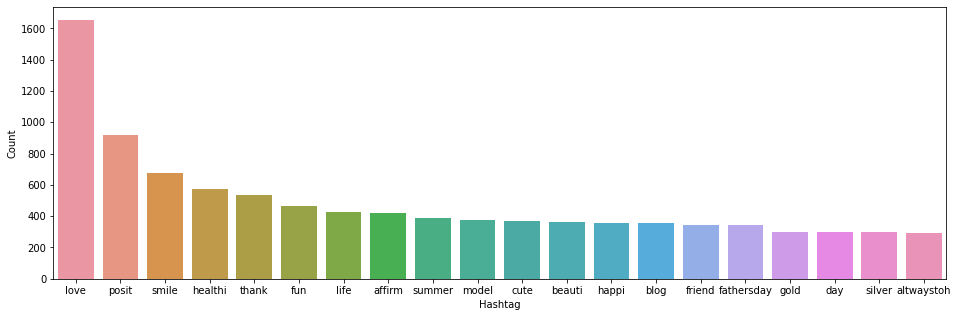

In [23]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag':list(a.keys()), 'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel ='Count') 
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of
the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

### Racist/Sexist Tweets

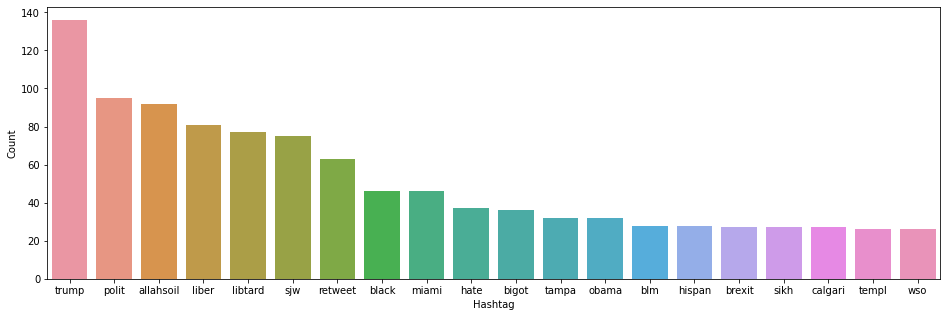

In [24]:
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag':list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad
idea to keep these hashtags in our data as they contain useful information. Next, we will try to
extract features from the tokenized tweets

### Bags of Words

**To analyse a preprocessed data, it needs to be converted into features. Depending upon the
usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and
Word Embeddings. Read on to understand these techniques in detail.**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

Let’s start with the Bag-of-Words Features.
Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the
corpus C. The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M
will be given by D X N. Each row in the matrix M contains the frequency of tokens in document
D(i).

Let us understand this using a simple example.

D1: He is a lazy boy. She is also lazy.
D2: Smith is a lazy person.
    
The dictionary created would be a list of unique tokens in the corpus =

[‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –

| | He | She | Lazy | Boy | Smith | Person |
| :- | :- | :- | :- | :- | :- | :- |
| D1 | 1 | 1 | 2 | 1 | 0 | 0 |
| D2 | 0 | 0 | 1 | 0 | 1 | 1 |

Now the columns in the above matrix can be used as features to build a classification model.

In [26]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,
max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(49159, 1000)

### TF-IDF features

This is another method which is based on the frequency method but it is different to the bag-ofwords approach in the sense that it takes into account not just the occurrence of a word in a
single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving
importance to words which are rare in the entire corpus but appear in good numbers in few
documents.

Let’s have a look at the important terms related to TF-IDF:
- TF = (Number of times term t appears in a document)/(Number of terms in the document)
- IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
- TF-IDF = TF*IDF

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,
max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(49159, 1000)

## Word2vec Features

Word embeddings are the modern way of representing words as vectors. The objective of word
embeddings is to redefine the high dimensional word features into low dimensional feature
vectors by preserving the contextual similarity in the corpus.

They are able to achieve tasks like **King -man +woman = Queen**, which is mind-blowing.

The advantages of using word embeddings over BOW or TF-IDF are:
1. Dimensionality reduction - significant reduction in the no. of features required to build a
model.
2. It capture meanings of the words, semantic relationships and the different types of
contexts they are used in.

### Word2Vec Embeddings
Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous
bag of words) and Skip-gram model. Both of these are shallow neural networks which map
word(s) to the target variable which is also a word(s). Both of these techniques learn weights
which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single
adjacent word or a group of surrounding words. The Skip-gram model works in the reverse
manner, it tries to predict the context for a given word.

There are three laters: - an input layer, - a hidden layer, and - an output layer.
The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of
the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is
used to sum the probabilities obtained in the output layer to 1. The weights learned by the model
are then used as the word-vectors.
We will go ahead with the Skip-gram model as it has the following advantages:
1. It can capture two semantics for a single word. i.e it will have two vector representations of
‘apple’. One for the company Apple and the other for the fruit.
2. Skip-gram with negative sub-sampling outperforms CBOW generally.
We will train a Word2Vec model on our data to obtain vector representations for all the unique
words present in our corpus. There is one more option of using pre-trained word vectors
instead of training our own model. Some of the freely available pre-trained vectors are:

1. Google News Word Vectors
2. Freebase names
3. DBPedia vectors (wiki2vec)

However, for this course, we will train our own word vectors since size of the pre-trained word
vectors is generally huge.
Let’s train a Word2Vec model on our corpus.

However, here, we will train our own word vectors since size of the pre-trained word
vectors is generally huge.

In [28]:
# Let’s train a Word2Vec model on our corpus.
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) #tokenizing
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            #size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)
model_w2v.train(tokenized_tweet, 
                total_examples=len(combi['tidy_tweet']), epochs=20)

(6510533, 7536020)

Let’s play a bit with our Word2Vec model and see how does it perform. We will specify a word
and the model will pull out the most similar words from the corpus.

In [29]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.6439759135246277),
 ('cookout', 0.6104389429092407),
 ('dess', 0.605725109577179),
 ('#avocado', 0.6045845150947571),
 ('aladdin', 0.5950358510017395),
 ('#cellar', 0.5919177532196045),
 ('enrout', 0.5877529978752136),
 ('#biall', 0.587720513343811),
 ('melani', 0.584907591342926),
 ('alfredo', 0.5806786417961121)]

In [30]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.6460371017456055),
 ('#delegaterevolt', 0.6390925645828247),
 ('melo', 0.6219804286956787),
 ('phoni', 0.613620400428772),
 ('endors', 0.6022980213165283),
 ('capitalist', 0.5964077711105347),
 ('tomlin', 0.5939619541168213),
 ('businessman', 0.5917482972145081),
 ('unfavor', 0.5907176733016968),
 ('potu', 0.5881997346878052)]

From the above two examples, we can see that our word2vec model does a good job of finding
the most similar words for a given word. But how is it able to do so? That’s because it has learned
vectors for every unique word in our data and it uses cosine similarity to find out the most
similar vectors (words).

Let’s check the vector representation of any word from our corpus.

In [31]:
model_w2v.wv['food']

array([ 0.20356432,  0.11887261,  0.44948334,  0.07435132, -0.40523952,
        0.10586043,  0.64117444, -0.08583242, -0.26050606, -0.07407744,
        0.06558198, -0.08538756,  0.22926478, -0.5923565 , -0.00344084,
       -0.7946848 ,  0.5887038 , -1.2976016 ,  0.12125866, -0.11887678,
       -0.13006932,  0.59656227,  0.29624233,  0.72080624, -1.0495664 ,
       -0.17918184, -0.50223833, -0.50928515,  0.4108388 , -0.568711  ,
       -0.5661042 , -0.66680574, -0.29119202,  0.42838696, -0.41306093,
       -1.2541584 , -0.5735325 ,  0.9810244 ,  0.38315868,  0.90034425,
       -0.3061681 ,  0.8082387 ,  0.16176397, -0.10374318,  0.0264002 ,
        0.09963235,  0.38786218, -0.67096674,  0.3470544 ,  0.36763284,
        0.38294208,  0.0857124 ,  0.7717669 ,  0.07724562, -0.6368567 ,
        0.47155315, -0.75936145,  0.15521392,  0.6037448 ,  0.3162998 ,
       -0.9940015 , -0.2828563 , -0.08357209,  0.77244955, -0.2616679 ,
        0.17279242,  0.61347485,  1.053294  ,  0.15926795, -0.35

In [32]:
len(model_w2v.wv['food'])

100

### Preparing Vectors for Tweets

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word
vectors from word2vec model to create vector representation for an entire tweet. There is a
simple solution to this problem, we can simply take mean of all the word vectors present in the
tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same
process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec
features for our data.

We will use the below function to create a vector for each tweet by taking the average of the
vectors of the words present in the tweet.

In [33]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary 
            continue
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set…

In [34]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 100)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
    wordvec_df.shape    

Now we have 100 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

## 2. Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors for
sentence/paragraphs/documents. This approach is an extension of the word2vec. The major
difference between the two is that doc2vec provides an additional context which is unique for
every document in the corpus. This additional context is nothing but another feature vector for
the whole document. This document vector is trained along with the word vectors.

Let’s load the required libraries.

In [35]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can
do so by using Gensim’s LabeledSentence() function.

In [36]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

#Let’s have a look at the result.
labeled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

Now let’s train a doc2vec model

In [37]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model dm_mean=1, # dm = 1 for using mean of the context word vectors
#size=200, # no. of desired features
window=5, # width of the context window                              
   
negative=7, # if > 0 then negative sampling will be used            
min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples=
len(combi['tidy_tweet']), epochs=15)

100%|██████████| 49159/49159 [00:00<00:00, 2638494.49it/s]


### Preparing doc2vec Feature Set

In [38]:
docvec_arrays = np.zeros((len(tokenized_tweet), 100))
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,100))    
docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 100)

## Modeling

We are now done with all the pre-modeling stages required to get the data in the proper form
and shape. We will be building models on the datasets with different feature sets prepared in the
earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use
the following algorithms to build models:
    
1. Logistic Regression
2. Support Vector Machine
3. RandomForest
4. XGBoost

**Evaluation Metric**

F1 score is being used as the evaluation metric. It is the weighted average of Precision and
Recall. Therefore, this score takes both false positives and false negatives into account. It is
suitable for uneven class distribution problems.

The important components of F1 score are:
    
1. True Positives (TP) - These are the correctly predicted positive values which means that
the value of actual class is yes and the value of predicted class is also yes.
2. True Negatives (TN) - These are the correctly predicted negative values which means that
the value of actual class is no and value of predicted class is also no.
3. False Positives (FP) – When actual class is no and predicted class is yes.
4. False Negatives (FN) – When actual class is yes but predicted class in no.
Precision = TP/TP+FP
Recall = TP/TP+FN
F1 Score = 2(Recall Precision) / (Recall + Precision)

### Logistic Regression

**Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes /
No, True / False) given a set of independent variables. You can also think of logistic regression as
a special case of linear regression when the outcome variable is categorical, where we are using
log of odds as the dependent variable. In simple words, it predicts the probability of occurrence
of an event by fitting data to a logit function.**

In [39]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

#### Bag-of-Words Features
We will first try to fit the logistic regression model on the Bag-of_Words (BoW) features.

In [40]:
# Extracting train and test BoW features 
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow,train['label'],random_state=42, test_size=0.3)
lreg = LogisticRegression()

# training the model 
lreg.fit(xtrain_bow, ytrain)

# predicting on the validation set
prediction = lreg.predict_proba(xvalid_bow) 

# if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

# calculating f1 score for the validation set
f1_score(yvalid, prediction_int) 

0.5303408146300915

In [41]:
# Now let’s make predictions for the test dataset and create a submission file.
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int 
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

Public Leaderboard F1 Score: 0.567

#### TF-IDF Features
We’ll follow the same steps as above, but now for the TF-IDF feature set.

In [42]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:]
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain)
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5451327433628319

#### Word2Vec Features

In [43]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain)
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6277153558052434

#### Doc2Vec Features

In [44]:
train_d2v = docvec_df.iloc[:31962,:] 
test_d2v = docvec_df.iloc[31962:,:]
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v, ytrain)
prediction = lreg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.34934497816593885

### Suppor Vector Machine (SVM)

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for
both classification or regression challenges. However, it is mostly used in classification problems.
In this algorithm, we plot each data item as a point in n-dimensional space (where n is the
number of features you have) with the value of each feature being the value of a particular
coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two
classes.

<img src="SVM.png" width="400" height="400">

In [45]:
from sklearn import svm

#### Bag-of-Words Features

In [46]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5102040816326531

#### TF-IDF Features

In [48]:
svc = svm.SVC(kernel='linear',
C=1, probability=True).fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5122615803814715

#### Word2Vec Features

In [49]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v,ytrain)
prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid,prediction_int)

0.6360856269113151

#### Doc2Vec Features

In [50]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v,
ytrain)
prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.2531380753138075

### Random Forest

Random Forest is a versatile machine learning algorithm capable of performing both regression
and classification tasks. It is a kind of ensemble learning method, where a few weak models
combine to form a powerful model. In Random Forest, we grow multiple trees as opposed to a
decision single tree. To classify a new object based on attributes, each tree gives a classification
and we say the tree “votes” for that class. The forest chooses the classification having the most
votes (over all the trees in the forest).

It works in the following manner. Each tree is planted & grown as follows:
    
1. Assume number of cases in the training set is N. Then, sample of these N cases is taken at
random but with replacement. This sample will be the training set for growing the tree.
2. If there are M input variables, a number m (m<M) is specified such that at each node, m
variables are selected at random out of the M. The best split on these m variables is used to
split the node. The value of m is held constant while we grow the forest.
3. Each tree is grown to the largest extent possible and there is no pruning.
4. Predict new data by aggregating the predictions of the ntree trees (i.e., majority votes for
classification, average for regression)

In [51]:
from sklearn.ensemble import RandomForestClassifier

#### Bag-of-Words Features

First we will train our RandomForest model on the Bag-of-Words features and check its
performance on both validation set and public leaderboard.

In [52]:
rf = RandomForestClassifier(n_estimators=400,random_state=11).fit(xtrain_bow, ytrain)
prediction = rf.predict(xvalid_bow)
# validation score 
f1_score(yvalid, prediction)

0.5529225908372828

#### TF-IDF Features

In [53]:
rf = RandomForestClassifier(n_estimators=400,
random_state=11).fit(xtrain_tfidf, ytrain)
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.562152133580705

#### Word2Vec Features

In [54]:
rf = RandomForestClassifier(n_estimators=400,
random_state=11).fit(xtrain_w2v, ytrain)
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.5168776371308017

#### Doc2Vec Features

In [55]:
rf = RandomForestClassifier(n_estimators=400,
random_state=11).fit(xtrain_d2v, ytrain)
prediction = rf.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.0704225352112676

### XGBoost

Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting
algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel
computation on a single machine makes it extremely fast. It also has additional features for doing
cross validation and finding important variables. There are many parameters which need to be
controlled to optimize the model.
Some key benefits of XGBoost are:
1. Regularization - helps in reducing overfitting
2. Parallel Processing - XGBoost implements parallel processing and is blazingly faster as
compared to GBM.
3. Handling Missing Values - It has an in-built routine to handle missing values.
4. Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the
boosting proces

In [ ]:
from xgboost import XGBClassifier

#### Bag-of-Words Features

In [ ]:
xgb_model = XGBClassifier(max_depth=6,
                          n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

#### TF-IDF Features

In [ ]:
xgb = XGBClassifier(max_depth=6, 
                    n_estimators=1000).fit(xtrain_tfidf,ytrain)
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

#### Word2Vec Features

In [ ]:
xgb = XGBClassifier(max_depth=6, 
                    n_estimators=1000, 
                    nthread=3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

XGBoost model on word2vec features has outperformed all the previuos models in this course.

#### Doc2Vec Features

In [ ]:
xgb = XGBClassifier(max_depth=6, 
                    n_estimators=1000, 
                    nthread=3).fit(xtrain_d2v, ytrain)
prediction = xgb.predict(xvalid_d2v) 
f1_score(yvalid, prediction)